## Dataset generation from deformable mirror

A Parabolic GRIN fiber or a Step-Index fiber can be used

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from mmfsim.grid import Grid
from mmfsim.fiber import GrinFiber, StepIndexFiber
from mmfsim.datasets import (
    SimulatedHyperspectralSpeckleOutputDataset,
    SimulatedHyperspectralGrinSpeckleOutputDataset,
    SimulatedHyperspectralStepIndexSpeckleOutputDataset,
)

### Setup

Set the computation grid and the fiber characteristics

In [91]:
wavelengths: list = [1064e-9, 1020e-9, 1108e-9]
fiber_type: str = 'step' # 'grin' or 'step'
grid_settings: dict = {'pixel_size': 1e-6, 'pixel_numbers': (64, 64)}
fiber_settings: dict = {'radius': 25e-6, 'wavelength': 1064e-9, 'n1': 1.465, 'n2': 1.45}
dataset_settings: dict = {'length': 10000, 'degen': True, 'phases_dim': (8, 8)}
fourier_settings: dict = {'pad': 1}
export_settings: dict = {'return_output_fields': False, 'add_exp_noise': False, 'noise_func': np.max, 'file_type': 'matlab'}

### Dataset generation

Generate the grid and the fiber

In [92]:
grid = Grid(**grid_settings)

if fiber_type.lower() in ['grin']:
    fiber_class = GrinFiber
    dset_class = SimulatedHyperspectralGrinSpeckleOutputDataset
elif fiber_type.lower() in ['step', 'si']:
    fiber_class = StepIndexFiber
    dset_class = SimulatedHyperspectralStepIndexSpeckleOutputDataset
else:
    raise ValueError(f"Unknown fiber type.")

fibers = []
for wvl in wavelengths:
    fiber_settings['wavelength'] = wvl
    fibers.append(fiber_class(**fiber_settings))

print(fibers[0])

c:\users\saucourt\coding\mmf_lp_modes\mmfsim\fiber.py:247: RuntimeWarning: invalid value encountered in sqrt
  w = np.sqrt(v**2 - u**2)
c:\users\saucourt\coding\mmf_lp_modes\mmfsim\fiber.py:248: RuntimeWarning: invalid value encountered in divide
  return sp.jv(n, u) / (u * sp.jv(n - 1, u)) + sp.kn(n, w) / (w * sp.kn(n - 1, w))


StepIndexFiber instance with:
  - Radius: 25.0 um
  - Core index: 1.465
  - Cladding index: 1.45
  - Wavelength: 1064.0 nm
  - Numerical aperture: 0.209
  - Number of guided LP modes: 127
  - Number of guided LP modes (counting degenerates): 244
  - First 10 LP_n,m modes characteristics:
  n_eff      h          n          m
[[ 1.46491504  0.          0.          1.        ]
 [ 1.46478431  2.          1.          1.        ]
 [ 1.46461254  4.          2.          1.        ]
 [ 1.46455239  1.          0.          2.        ]
 [ 1.46440201  6.          3.          1.        ]
 [ 1.46427707  3.          1.          2.        ]
 [ 1.46415411  8.          4.          1.        ]
 [ 1.46395943  5.          2.          2.        ]
 [ 1.46390022  2.          0.          3.        ]
 [ 1.46386979 10.          5.          1.        ]]


Compute and store the modes for a much faster dataset generation, plot one for checking extent

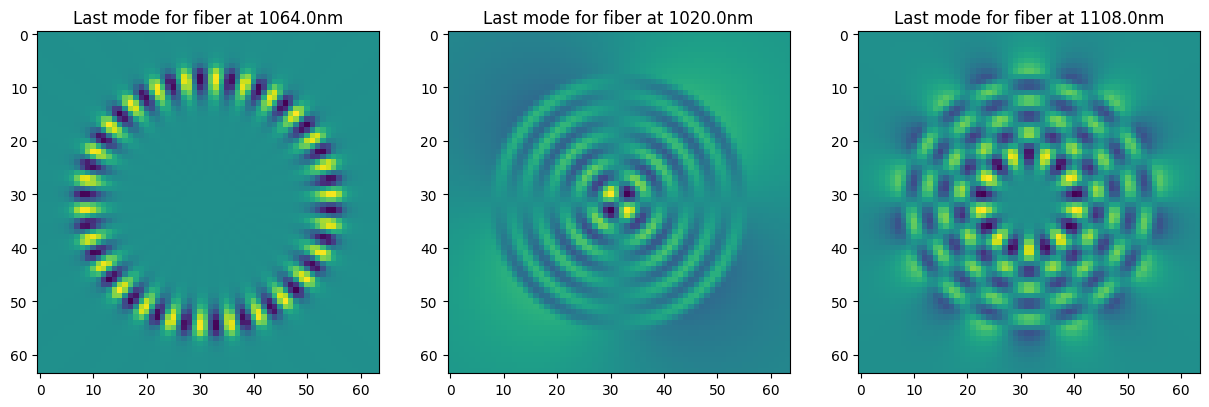

In [93]:
plt.figure(figsize=(15, 5))

for i, fiber in enumerate(fibers):
    fiber.compute_modes_fields(grid)

    plt.subplot(1, len(fibers), i + 1)
    plt.imshow(fiber._modes[:,:,1,-1])
    plt.title(f"Last mode for fiber at {wavelengths[i] * 1e9:.1f}nm")

Compute dataset

In [94]:
dset = dset_class(
    fibers, 
    grid,
    N_modes=[fiber._N_modes_degen for fiber in fibers],
    length=dataset_settings['length'],
    degen=dataset_settings['degen'],
)

dset.compute(phases_dim=dataset_settings['phases_dim'])
# dset.compute_from_transfer_matrix(phases_dim=dataset_settings['phases_dim'])

Found 4 input variable weights below threshold 0.001 to delete.
Successfully deleted low weight input variables.
Computed TM row 1/60
Computed TM row 2/60
Computed TM row 3/60
Computed TM row 4/60
Computed TM row 5/60
Computed TM row 6/60
Computed TM row 7/60
Computed TM row 8/60
Computed TM row 9/60
Computed TM row 10/60
Computed TM row 11/60
Computed TM row 12/60
Computed TM row 13/60
Computed TM row 14/60
Computed TM row 15/60
Computed TM row 16/60
Computed TM row 17/60
Computed TM row 18/60
Computed TM row 19/60
Computed TM row 20/60
Computed TM row 21/60
Computed TM row 22/60
Computed TM row 23/60
Computed TM row 24/60
Computed TM row 25/60
Computed TM row 26/60
Computed TM row 27/60
Computed TM row 28/60
Computed TM row 29/60
Computed TM row 30/60
Computed TM row 31/60
Computed TM row 32/60
Computed TM row 33/60
Computed TM row 34/60
Computed TM row 35/60
Computed TM row 36/60
Computed TM row 37/60
Computed TM row 38/60
Computed TM row 39/60
Computed TM row 40/60
Computed TM row 

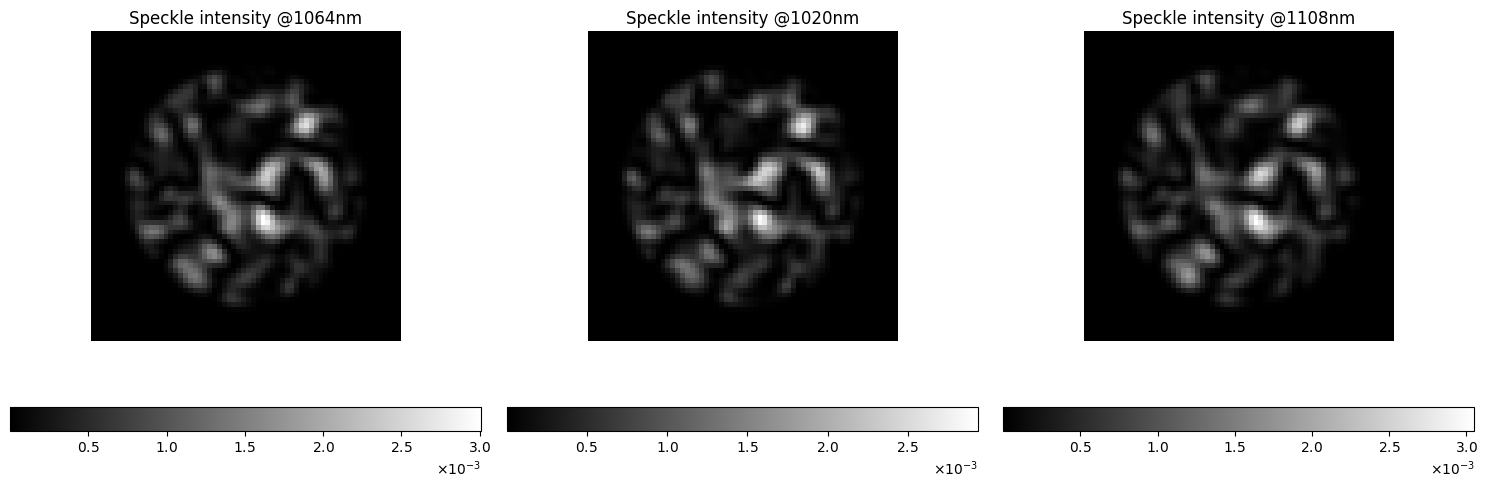

In [97]:
dset.plot_example(as_rgb=False)

### Dataset checking and export

Display a random draw from the dataset as a check

Export it if it looks ok

In [99]:
dset.export()

Dataset saved: .\synth_step_dset_lambdas=[1064, 1020, 1108]nm_degen=True_len=10000_mirr=64.mat
